# Exam 3 - Trend Prediction using Machine Learning 

## Introduction

In this mini project, we will be aiming to use a Support Vector Machine (SVM) model to predict positive moves in the price of Bitcoin, to optimise this model through hyperparameter tuning,  and to evaluate our model its prediction quality using a variety of different metrics. 

## 1. Cost Function of Logistic Regression 

Logistic Regression is a commonly used algorithm for classification problems, and at a high level, it works to map quantitative data onto categorical variables. The reason it is used for classification problems is because linear regression is not a good fit for binary classification problems, such as if we are trying to predict whether the price of a security will go up or down. Thus, instead of a linear function, we use a sigmoidal function like the logistic function below: 

\begin{align}
    h_{\theta}(x) &= \frac{1}{1 + e^{-\theta_0 - \theta_1x}} \tag{1}
\end{align}

The cost function for Logistic Regression represents how far away the model is from real world data. Using this cost function, we can adjust the Logistic Regression model by varying its parameters to better fit the real data, and this is usually achieved by minimising the cost function. As usual, the cost function should be postive unless we have a perfect fit to our real data, and it should have a single, or Global, minimum. The  quadratic cost function, which is used for Linear Regression does not always have a single minimum when $h_{\theta}$ is our logistic function. Instead we can use the function below, which satisfies both these conditions:

\begin{align}
    J(\theta) &= -\frac{1}{N} \sum_{n=1}^{N} (y^{(n)} \ln(h_\theta(x^{(n)})) + (1 - y^{(n)}) \ln(1 - h_\theta(x^{(n)}))) \tag{2}
\end{align}

This cost function is appropriate for logistic regression because $y$ can only take two values, 0 or 1, so when $y=1$, the cost function becomes $-\ln(h_\theta(x))$. Thus, if the model predicition $h_\theta(x)$ is close to 1, the cost function $J(\theta)$ decreases to 0, and if the model predicition $h_\theta(x)$ is close to 0, the cost function $J(\theta)$ increases. Similarly, for $y=0$, the cost function becomes $-\ln(1 - h_\theta(x))$, and if the model predicts $1-h_\theta(x)$ is close to 1, then the cost is low, and if the model predicts $1-h_\theta(x)$ to be close to 0, then the cost increases. Hence, cost is minimised when the predicted probabilities match their actual labels.

Gradient descent is used to minimize the cost function and to find the optimial parameters $\theta$, and the gradient of the cost function becomes:

\begin{align}
    \frac{\partial J(\theta)}{\partial \theta_j} &= \frac{1}{N} \sum_{n=1}^{N} \left( h_\theta(x^{(n)}) - y^{(n)} \right) x_j^{(n)} \tag{3}
\end{align}

Where $x_j^{(n)}$ is the $j$-th feature of the $n$-th training example.

## 2. Voting Classifiers in Ensemble Learning 

Voting Classifiers are a type of ensemble learning technique in which multiple models / classifiers are used together to produce a robust predictive model. By combining different models together, we can leverage the strengths of different individal models to produce a more accurate larger model. There are two main types of voting - hard voting and soft voting. In hard voting, each classifer in our ensemble model makes a prediction for each instance, and the final prediction is the class that recieves the majority of the votes.  Soft voting on the other hand works with each classifier providing a probability estimate for each class. Then, the probabilities are averaged with the class with the highest average probability being chosen as the final prediciton. 

Looking further at hard voting, this is where the final prediction is determined by a majority, or a modal value. Each classifier in the ensemble makes a predicition, and the modal class is selecting as the final ouput. We can represent this as: 

\begin{align*}
    \hat{y} = \text{mode}(y_{1}, y_{2}, y_{3}, ..)  \tag{4}
\end{align*}

Where $\hat{y}$ is the final predicted class, $y_{i}$ is the predicted class by the $i$-th classifier, and mode() is the statistical mode. 

For soft voting, each classifier in the ensemble provides an individual probability for each class, and the final prediction of the model is based on an average of all these probabilities. Thus, the class with highest average probability is chosen, as seen below:

\begin{align*}
    \hat{y} = \arg\max_c \left( \frac{1}{n} \sum_{i=1}^n P_{i}(c) \right)  \tag{5}
\end{align*}

Where $\hat{y}$ is the final predicted class, $P_{i}(c)$ is the predicited probability of the class c by the $i$-th classifier and $\arg\max_c$ denotes the class c that maximises the average probability.

## 3. Building Machine Learning Model

### 1. Outlining the Methodology

As previously mentioned, we will be using the Support Vector Machine model (SVM) to build a classification model to predict positive moves in the price of Bitcoin-USD. At a high level, SVM is a supervised machine learning algorithm that can be used for both regression or classification tasks. An SVM classifier works by finding the optimal hyperplane that best divides data points of two different classes. The optimal hyperplane maximises the margin, which is the distance between the hyperplane and the nearest data points of each class, and then the decision function determines on which side of the hyperplane a data point lies. 

The hyperplane equation for a dataset with n features is as follows :

\begin{align*}
    w \cdot x - b = 0  \tag{6}
\end{align*}

where $w$ is the weight vector, $x$ is the feature vector and $b$ is the bias term. 


Next, we would want a decision rule to classify a data point as either an uptrend (1) or as a downtrend (0), e.g. if equation (6) is greater than / or equal to 0 we classify as uptrend, and if equation 6 is less than 0 we classify as a downtrend.

The final stage would be to optimise this, in which  our goal is to maximise the margin $\frac{2}{\|\mathbf{w}\|}$, which would give us the below constrained optimisation problem :


\begin{align*}
    \min_{w,b} \frac{1}{2} \|\mathbf{w}\|^2 \tag{7}
\end{align*}

subject to :

\begin{align*}
    y_{i}(w \cdot x_{i} - b) \geq 1   \quad \forall i \tag{8}
\end{align*}

Where $y_{i}$ is the label of the $i$-th point 

In addition to the above steps, different kernals can be used for non-linearly seperable data (such as time series data), to map input features into a higher dimensional space where a linear hyperplane can then be used to seperate the data. We will primarily be using the Radial Basis Function Kernal (RBF), since this has advantages for time series data as it can model the complex non-linear relationships in time series data caused by trends and other patterns. The equation for this kernal function is as follows :

\begin{align*}
     K(\mathbf{x}_i, \mathbf{x}_j) = \exp \left( -\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2 \right) \tag{9}
\end{align*}


Where $\gamma$ is a hyperparameter that can be tuned ($\gamma$ defines the infulence of a single training example on our model)




We will begin by importing the necessary libraries:

In [1]:
# Required imports 
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from functools import partial
# Classifier
from sklearn.svm import SVC
# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import (
                                    train_test_split,
                                    TimeSeriesSplit
                                    )
# Metrics
from sklearn.metrics import (
                            accuracy_score,
                            classification_report,
                            RocCurveDisplay,
                            ConfusionMatrixDisplay,
                            log_loss
)
# Hyperparameters
from sklearn.model_selection import GridSearchCV

### 2. Data Collection

We will now move to stage 2 of model development, data collection, where we will leverage data from yahoo finance and store this as a csv:

In [2]:
# Step 1: Download Data and Save as CSV
df = yf.download("BTC-USD", start="2019-05-01", end="2024-05-01")
df.reset_index(inplace=True)
df.to_csv('btc_usd_data.csv', index=False)

# Step 2: Read the CSV with parse_dates
df = pd.read_csv('btc_usd_data.csv', index_col=0, parse_dates=True)

# Ensure the index is a datetime object
df.index = pd.to_datetime(df.index)

# Display the first 2 rows of the dataframe
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,5402.697266,13679528236
2019-05-02,5402.422852,5522.262695,5394.217285,5505.283691,5505.283691,14644460907
2019-05-03,5505.552246,5865.881836,5490.201660,5768.289551,5768.289551,18720780006
2019-05-04,5769.202637,5886.893555,5645.469238,5831.167480,5831.167480,17567780766
2019-05-05,5831.068359,5833.862793,5708.035156,5795.708496,5795.708496,14808830723


### 3. EDA

Next is Exploratory Data Analysis, or EDA, where we will generate some plots and descriptive statistics to analyse the completness of our dataset, and to get a general understanding of how the data looks.

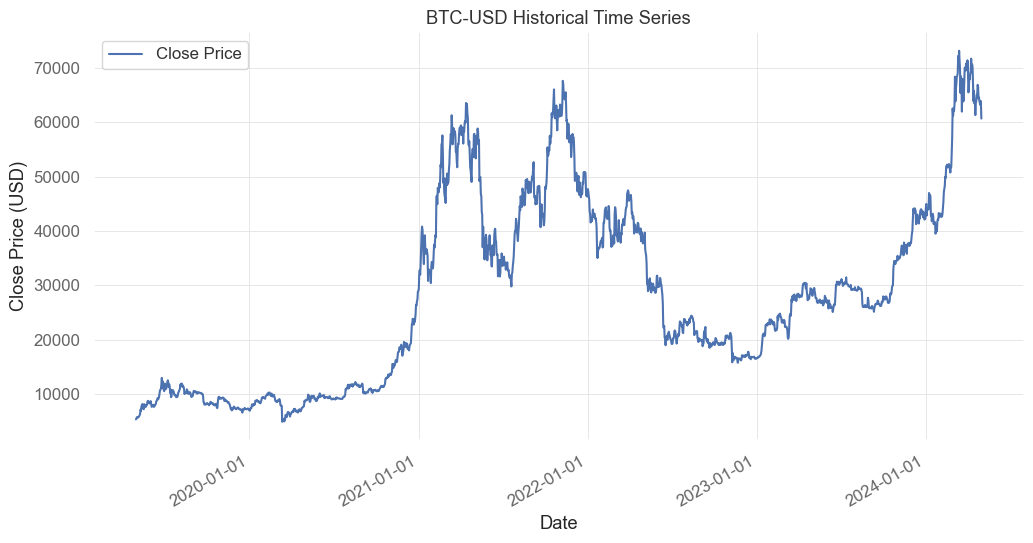

In [890]:
# Visualize data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
# Set the date format on the x-axis
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title('BTC-USD Historical Time Series')
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()  # Rotate the x-axis labels for better readability
plt.show()

The plot above is a simple time series plot of the close price of Bitcoin-USD over the past 5 year (May 2019 - May 2024). 

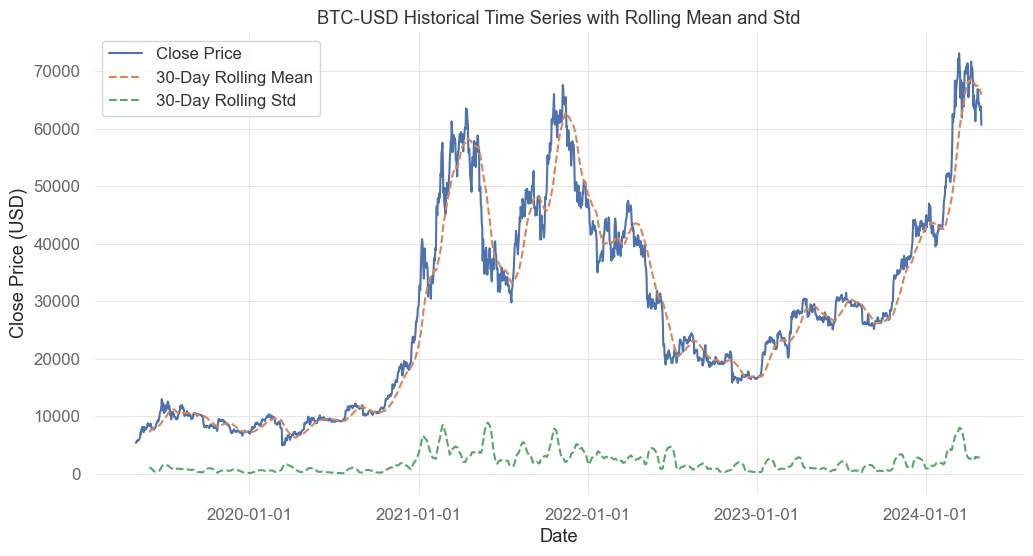

In [891]:
# Plotting rolling mean and standard deviation 
df['Rolling_Mean'] = df['Close'].rolling(window=30).mean()
df['Rolling_Std'] = df['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['Rolling_Mean'], label='30-Day Rolling Mean', linestyle='--')
plt.plot(df.index, df['Rolling_Std'], label='30-Day Rolling Std', linestyle='--')
# Set the date format on the x-axis
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('BTC-USD Historical Time Series with Rolling Mean and Std')
plt.legend()
plt.grid(True)
plt.show()

Now we have added the 30-Day rolling mean and standard deviation to our plot, and we can see some spikes in the standard deviation, or volatility, around the large bull runs in early-mid 2021 and in late 2021 as well, with the most recent surge in price being in the first quarter of 2024.

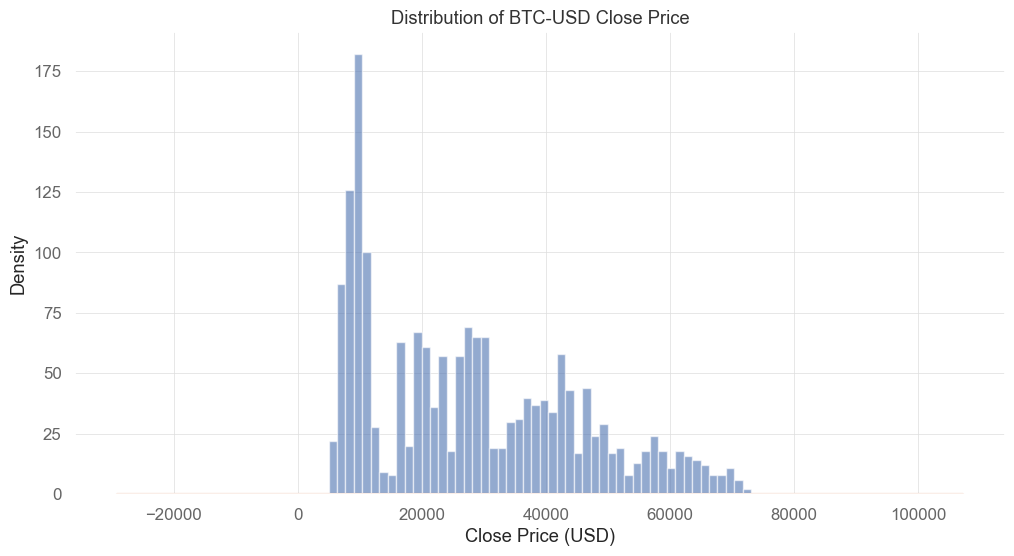

In [892]:
# Histogram plot
plt.figure(figsize=(12, 6))
df['Close'].plot(kind='hist', bins=50, alpha=0.6)
df['Close'].plot(kind='kde')
plt.xlabel('Close Price (USD)')
plt.title('Distribution of BTC-USD Close Price')
plt.grid(True)
plt.show()


The histogram above simply shows us the distribution of the close price of Bitcoin-USD over the past 5 years, with the biggest cluster being around the 10,000 USD range. 

In [893]:
# Generating Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1827.0,2.803057e+04,1.715837e+04,5.002578e+03,1.090480e+04,2.622828e+04,4.106954e+04,7.307938e+04
High,1827.0,2.866918e+04,1.758830e+04,5.331834e+03,1.110140e+04,2.661800e+04,4.218390e+04,7.375007e+04
Low,1827.0,2.734714e+04,1.666075e+04,4.106981e+03,1.065298e+04,2.584609e+04,3.981113e+04,7.133409e+04
Close,1827.0,2.805860e+04,1.716372e+04,4.970788e+03,1.091425e+04,2.624020e+04,4.111096e+04,7.308350e+04
Adj Close,1827.0,2.805860e+04,1.716372e+04,4.970788e+03,1.091425e+04,2.624020e+04,4.111096e+04,7.308350e+04
Volume,1827.0,3.066820e+10,1.787918e+10,5.331173e+09,1.882332e+10,2.695493e+10,3.775489e+10,3.509679e+11
Rolling_Mean,1798.0,2.793546e+04,1.667338e+04,6.293483e+03,1.084288e+04,2.648648e+04,4.089312e+04,6.855535e+04
Rolling_Std,1798.0,1.986929e+03,1.735736e+03,1.256436e+02,6.814060e+02,1.427382e+03,2.809486e+03,8.906455e+03


### 4. Data Cleaning 

In [894]:
# Check for missing values
df.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Rolling_Mean    29
Rolling_Std     29
dtype: int64

Given that we have a complete historical time series, we do not need to apply any techniques to forwardfill or backfill any missing data here. 

### 5. Feature Selection / Scaling 

We begin the feature selection process by adding feature columns to our initial dataframe. We have selected numerous features that we believe are relevant to the price of bitcoin, including Exponetial Moving Average, Open-Close, Volume Moving Average and other features visible below.  

In [895]:
# Creating Features  
df['HC'] = df['High'] - df['Close']
df['RET'] = np.log(df['Close'] / df['Close'].shift(1))
df['MA7'] = df['Close'] / df['Close'].rolling(7).mean() 
df['VMA'] = df['Volume'] / df['Volume'].rolling(7).mean()
df['OC_'] = df['Close'] / df['Open'] - 1
df['OC'] = df['OC_'].rolling(7).mean()
df['OC'] = df['OC_'].rolling(14).mean()  
df['HC_'] = df['High'] / df['Low'] - 1
df['HC'] = df['HC_'].rolling(7).mean()
df['GAP_'] = df['Open'] / df['Close'].shift(1) - 1 
df['GAP'] = df['GAP_'].rolling(7).mean() 
df['STD'] = df['RET'].rolling(7).std()
df['UB'] = df['Close'].rolling(7).mean() + df['Close'].rolling(7).std() * 2 
period = 30  # Period for EMA calculation
df['EMA'] = df['Close'].ewm(span=period, adjust=False).mean()
df.dropna(inplace=True)
df.head()


,Open,High,Low,Close,Adj Close,Volume,Rolling_Mean,Rolling_Std,HC,RET,MA7,VMA,OC_,OC,HC_,GAP_,GAP,STD,UB,EMA
Date,,,,,,,,,,,,,,,,,,,,
2019-05-30,8661.760742,9008.314453,8221.273438,8319.472656,8319.472656,29246528551,7267.533870,1118.714858,0.047307,-0.040057,0.983425,1.138943,-0.039517,0.005007,0.095732,0.000263,0.000105,0.034924,9133.754676,7468.846084
2019-05-31,8320.286133,8586.659180,8172.550781,8574.501953,8574.501953,25365190957,7373.260693,1085.791785,0.048772,0.030194,1.003621,0.990846,0.030554,0.012107,0.050671,0.000098,0.000122,0.035943,9074.222915,7540.178721
2019-06-01,8573.839844,8625.600586,8481.578125,8564.016602,8564.016602,22488303544,7475.218457,1047.263597,0.048472,-0.001224,0.993894,0.877332,-0.001146,0.012711,0.016981,-0.000077,0.000030,0.036202,8926.836351,7606.232777
2019-06-02,8565.473633,8809.303711,8561.235352,8742.958008,8742.958008,20266216022,7574.374072,1020.558880,0.038860,0.020679,1.013489,0.819942,0.020721,0.005054,0.028976,0.000170,0.000007,0.023490,8949.500351,7679.569889
2019-06-03,8741.747070,8743.500000,8204.185547,8208.995117,8208.995117,22004511436,7653.634993,971.670766,0.044321,-0.063018,0.961090,0.921952,-0.060943,0.002606,0.065737,-0.000139,-0.000026,0.032551,8947.795359,7713.726355


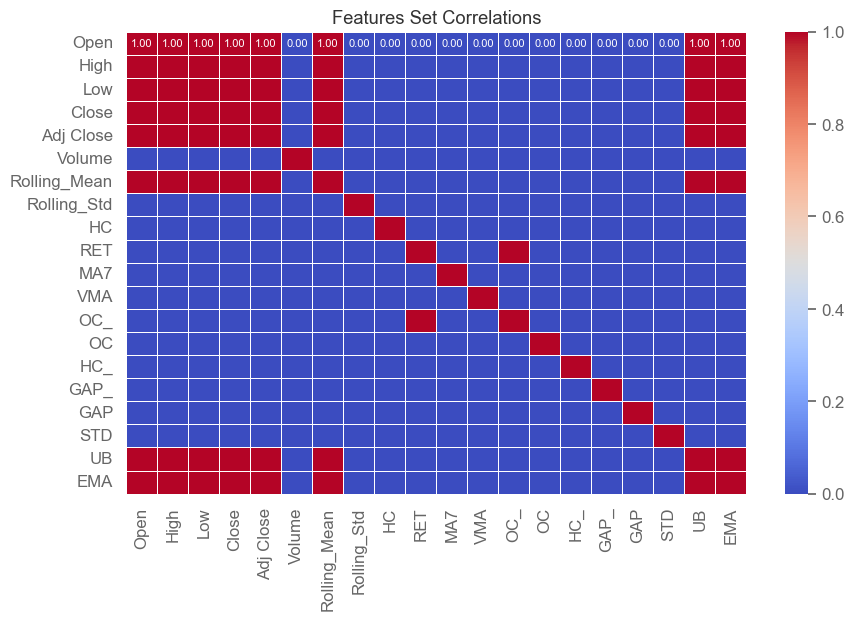

In [896]:
# Producing correlation heatmap 
sns.heatmap(df.corr()>0.9,
            annot=True,
annot_kws={"size": 8},
fmt=".2f",
linewidth=.5,
cmap="coolwarm",
cbar=True); #cmap="crest", virids, magma
plt.title('Features Set Correlations');

The correlation heatmap allows for us to visualise which features are correlated, and we can then define a function to allow us to remove the first feature that is correlated with any other given features, specifiying a threshold of our choice for the correlation.

In [897]:
# Remove the first feature that is correlated with any other feature
def correlated_features(data, threshold=0.9):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > threshold:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
    return col_corr

In [898]:
test_drop = correlated_features(df)
test_drop

{'Adj Close', 'Close', 'EMA', 'High', 'Low', 'OC_', 'Rolling_Mean', 'UB'}

In [899]:
# total correlated features 
drop_correlated_features = correlated_features(df) # drop the highly correlated features
X = df.drop(drop_correlated_features, axis=1)
# record feature names
feature_names = X.columns
feature_names

Index(['Open', 'Volume', 'Rolling_Std', 'HC', 'RET', 'MA7', 'VMA', 'OC', 'HC_',
       'GAP_', 'GAP', 'STD'],
      dtype='object')

In [900]:
X = df.values
len(X)

1798

We have now removed correlated features, and created a 1785*12 matrix of features, X, which will be the input to our SVM classification model. 

In [901]:
# Specify y
y = np.where(df['Close'].shift(-1)>0.995*df['Close'],1,0)

In [902]:
# Check Class Imbalance
pd.Series(y).value_counts()

1    1119
0     679
Name: count, dtype: int64

Finally, we have completed our label specification, where we are assigning labels to our data point (close price) based on if tomorrows close price is greater than 0.995 of todays close price. If this is the case, we assign a positive, or "buy" label (1), and if not, we assign a negative label (0). Hence, we can work to predict the up-trends using our model. We can also see from the value counts that there is a fairly large class imbalance, in favour of the positive class, which we will address later in our model development.

### 6. Model Building 

In order to build a SVM classifier model, we will first have to split our dataset into train and test data, and we will be following a standard 80/20 train-test split.

In [903]:
# Split the Data into Training and Testing - 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

We are now going to leverage the Pipline feature of scikit learn, using the standard scaler to ensure that our dataset is scaled properly for the model to work, and that all the features of the model have a similar scaling. If our features are not correctly scaled, then for algorithms such as SVM that rely on distance metrics, features with larger magnitutdes will dominate distance calculations, which leads to biased results. To address the class imbalance we touched upon in section 5. , we will be using the SVC model (Support Vector Classifier) with the class weight set to balanced, which uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data . Thus, the model assigns lower weights to class 1, and higher weights to class 0 due to the imbalance between classes. 

In [904]:
# Initialising base model 
classifier = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", SVC(probability=True, class_weight='balanced'))
])

classifier.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(class_weight='balanced', probability=True))])

In [905]:
# Verify Class Labels
classifier.classes_

array([0, 1])

In [1002]:
# Predicting class Labels
y_pred = classifier.predict(X_test)
y_pred[-200:-190]

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [1003]:
# Predicting probabilities
y_proba = classifier.predict_proba(X_test)
y_proba[-200:-190]

array([[0.36872226, 0.63127774],
       [0.38546245, 0.61453755],
       [0.35720899, 0.64279101],
       [0.40767577, 0.59232423],
       [0.40852982, 0.59147018],
       [0.4054752 , 0.5945248 ],
       [0.38039893, 0.61960107],
       [0.40346027, 0.59653973],
       [0.39851836, 0.60148164],
       [0.36863305, 0.63136695]])

Now we have verified that the model predictions align with the predicted probabilities, as we can see the predictions align with their predicited probabilites. Due to the use of the balanced class weights, it appears as though the decision boundary has been shifted slightly (to penalise the majority class), and hence a data point is only classified as an up-trend if the predicted probability for class 1 is greater than approximately 0.61, instead of 0.50. We can verify the models performance with this decison boundary in our model evaluation stage.

### 7. Model Validation

In [908]:
# Get the Scores
acc_train = accuracy_score(y_train, classifier.fit(X_train, y_train).predict(X_train))
acc_test = accuracy_score(y_test, classifier.predict(X_test))
print(f'Baseline Model -- Train Accuracy: {acc_train:0.4}, Test Accuracy:{acc_test:0.4}')

Baseline Model -- Train Accuracy: 0.6113, Test Accuracy:0.4222


From the initial report on the baseline model, we can see that the train accuracy is noticably higher than the test accuracy. Since there is a big gap between the training and testing accuracy,  this is an indication that the model may be overfitting the training data, which we can use hyperparameter tuning to resolve.

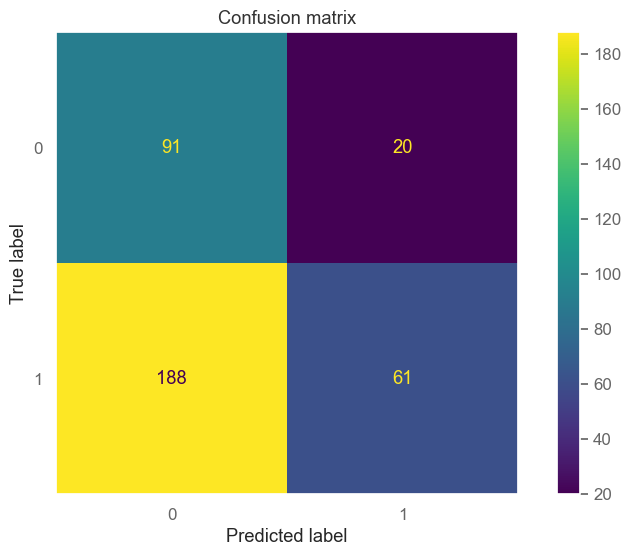

In [1187]:
# Display confussion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
X_test,
y_test,
# display_labels=model.classes_, cmap=plt.cm.Blues
    )
plt.title('Confusion matrix')
plt.grid(False)
plt.show()

Since we are focusing on predicting up trends, we are focusing on the bottom right corner (true-positives) in the confusion matrix. The goal of hyperparmeter tuning will be to increase the number of true positives (in the bottom right corner of the confusion matrix) to improve model precision as well as to reduce the number of false negatives (bottom left corner of confusion matrix) to improve the recall of the model. 

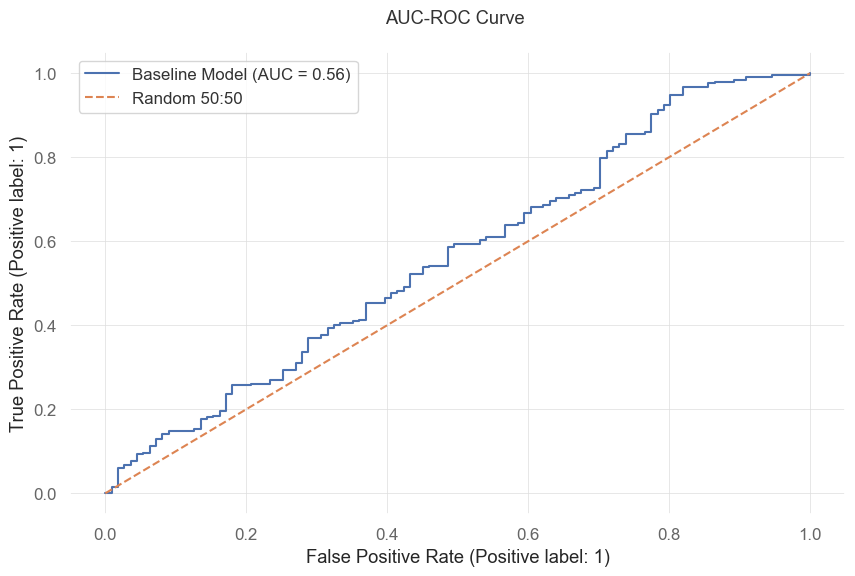

In [1012]:
# Display ROCCurve
disp = RocCurveDisplay.from_estimator(
            classifier,
            X_test,
            y_test,
            name='Baseline Model')
plt.title("AUC-ROC Curve \n")
plt.plot([0,1],[0,1],linestyle="--", label='Random 50:50')
plt.legend()
plt.show()

From the AUC (area under curve) of our ROC Curve (Receiver Operating Characteristic), our baseline model has a value of 0.56, so the model has a slight edge (not entirely random). We want to improve this however and can do so via hyperparameter tuning in the next section. 

In [911]:
# Classification Report
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.33      0.82      0.47       111
           1       0.75      0.24      0.37       249

    accuracy                           0.42       360
   macro avg       0.54      0.53      0.42       360
weighted avg       0.62      0.42      0.40       360



The classification report allows us to numerically evaluate the perfomance of our baseline model, in terms of precision recall and the f1-score. We are primarily interested in the models predictive power with regards to up trends or the label 1, and we can see that the precision of the model is relatively high at 0.75 for predicting up trends. However, the recall is very low at 0.24, which indicates that the model has a tendancy to miss out on a lot of potential buy signals / up-trends. The f1-score tells us balance between precision and recall, which is only 0.37 for the up-trends, so we will need to improve these using hyperparameter tuning. 

### 8. Hyperparameter Tuning

We begin the hyperparameter tuning stage by listing out all of the possible hyperparameters that can be tuned for the SVC model.

In [1013]:
# Get Params list to see what hyperparameters we can tune
classifier.get_params()


{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', SVC(class_weight='balanced', probability=True))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': SVC(class_weight='balanced', probability=True),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__C': 1.0,
 'classifier__break_ties': False,
 'classifier__cache_size': 200,
 'classifier__class_weight': 'balanced',
 'classifier__coef0': 0.0,
 'classifier__decision_function_shape': 'ovr',
 'classifier__degree': 3,
 'classifier__gamma': 'scale',
 'classifier__kernel': 'rbf',
 'classifier__max_iter': -1,
 'classifier__probability': True,
 'classifier__random_state': None,
 'classifier__shrinking': True,
 'classifier__tol': 0.001,
 'classifier__verbose': False}

Now we will leverage the optuna library for hyperparameter tuning, and then we will define an optimisation function which will specify what particular hyperparameters we are looking to tune, and the range of values we are trialing for each hyperparameter. 

In [1014]:
# Importing Library for Hyperparameter Tuning
import optuna

In [1015]:
# Set random seeds for reproducibility 
SEED = 100
np.random.seed(SEED)

In [1257]:
# Defining our objective function 
def optimize(trial, x, y):
    # specify params range
    tolerance = trial.suggest_float("tol", 0.001, 0.01, log=True) 
    #regularization = trial.suggest_float('C', 0.001, 1, log=True) 
    gamma = trial.suggest_float("gamma", 0.001, 1, log=True)
    #kernel = trial.suggest_categorical('kernel', ['poly', 'rbf', 'sigmoid'])
    model = Pipeline([
        ("scaler", StandardScaler()), ("model", SVC(
        #C=regularization,
        tol=tolerance,
        gamma=gamma,
        #kernel=kernel,
        class_weight='balanced'))
    ])
    tscv = TimeSeriesSplit(n_splits=3, gap=1) 
    ll = []
    for idx in tscv.split(x):

        train_idx, test_idx = idx[0], idx[1]
        xtrain = x[train_idx]
        ytrain = y[train_idx]
        xtest = x[test_idx]
        ytest = y[test_idx]
        model.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        ll.append(log_loss(ytest, preds))
    return -1.0 * np.mean(ll)

Now, we will create a study in optuna to minimise the log loss function, and then we apply our optimisation function to the optuna study in order to get the best values for our set of hyperparameters. 

In [1271]:
study = optuna.create_study(
    study_name='hp_lr',
    direction='minimize',
    sampler=optuna.samplers.TPESampler(seed=SEED)
)

[I 2024-06-10 20:33:33,331] A new study created in memory with name: hp_lr


In [1272]:
# Specify Optimization function
optimization_function = partial(optimize, x=X, y=y)
study.optimize(optimization_function, n_trials=20)

[I 2024-06-10 20:33:35,079] Trial 0 finished with value: -18.65065064009996 and parameters: {'tol': 0.003494660102410218, 'gamma': 0.006840819876172165}. Best is trial 0 with value: -18.65065064009996.
[I 2024-06-10 20:33:35,175] Trial 1 finished with value: -16.857833433662808 and parameters: {'tol': 0.0026577711982616577, 'gamma': 0.34223813214707516}. Best is trial 0 with value: -18.65065064009996.
[I 2024-06-10 20:33:35,272] Trial 2 finished with value: -18.008447461674713 and parameters: {'tol': 0.001010924812585653, 'gamma': 0.0023158336619138933}. Best is trial 0 with value: -18.65065064009996.
[I 2024-06-10 20:33:35,370] Trial 3 finished with value: -16.911350365198246 and parameters: {'tol': 0.004685426016771215, 'gamma': 0.30030202815783874}. Best is trial 0 with value: -18.65065064009996.


[I 2024-06-10 20:33:35,467] Trial 4 finished with value: -18.195756722048746 and parameters: {'tol': 0.001369955908194689, 'gamma': 0.05312268141071219}. Best is trial 0 with value: -18.65065064009996.
[I 2024-06-10 20:33:35,562] Trial 5 finished with value: -18.249273653584183 and parameters: {'tol': 0.007786135445417829, 'gamma': 0.004242348737644761}. Best is trial 0 with value: -18.65065064009996.
[I 2024-06-10 20:33:35,657] Trial 6 finished with value: -17.981688995906996 and parameters: {'tol': 0.0015322450236637164, 'gamma': 0.0021141250463248304}. Best is trial 0 with value: -18.65065064009996.
[I 2024-06-10 20:33:35,753] Trial 7 finished with value: -15.252325487599684 and parameters: {'tol': 0.0016584313263890045, 'gamma': 0.862722955775213}. Best is trial 0 with value: -18.65065064009996.
[I 2024-06-10 20:33:35,848] Trial 8 finished with value: -18.195756722048746 and parameters: {'tol': 0.006481613778996926, 'gamma': 0.003279616314860832}. Best is trial 0 with value: -18.65

In [1273]:
# Get the Best Params
print(f'Best Params: {study.best_params}, Best Value: {study.best_value}')

Best Params: {'tol': 0.003494660102410218, 'gamma': 0.006840819876172165}, Best Value: -18.65065064009996


Above we can see the results of 20 trials in optuna (with the random seed fixed for reproducablility), the best results for each of the individual hyperparameters as well as the best / minimum value of our log loss function which we were aiming to minimise. The hyperparameters above were chosen by a series of trial and error, to see which combination of hyperparameters was able to improve the performance of the model the most. We will now visualise some of the statistics related to the hyperparameters.

In [1274]:
# Plot Optimization History
optuna.visualization.plot_optimization_history(study)

In [1275]:
# Plot Param Importances
optuna.visualization.plot_param_importances(study)

In [1276]:
# plot accuracies for each HP trail
optuna.visualization.plot_slice(study)

In [1277]:
# plot the surface
optuna.visualization.plot_contour(study, params=['gamma', 'tol'])

In [1278]:
# plot parallel coordinates
optuna.visualization.plot_parallel_coordinate(study)

Now that we have plotted hyperparameter importance alongside other plots including the contour plot to help us visualise the effects of different combinations of hyperparameters on the log loss function. Now, we will use the best values of our hyperparameters to fit a new, tuned model that should help us address some of the shortcomings of the intial baseline model. 

In [1279]:
# Scale and fit the model
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("estimator", SVC(
        tol=study.best_params['tol'],
        #C=study.best_params['C'],
        gamma=study.best_params['gamma'],
        #kernel=study.best_params['kernel'],
        class_weight='balanced',
        ))
])
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 SVC(class_weight='balanced', gamma=0.006840819876172165,
                     tol=0.003494660102410218))])

In [1284]:
# Predict Class Labels
y_pred = clf.predict(X_test)
# Measure Accuracy
acc_train = accuracy_score(y_train, clf.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)
# Print Accuracy
print(f'\n Training Accuracy \t: {acc_train :0.4} \n Test Accuracy \t\t:{acc_test :0.4}')


 Training Accuracy 	: 0.5619 
 Test Accuracy 		:0.5306


We can see there is a much closer gap between the training and the testing accuracies, which is indicates that the model is not overfitting significantly, as the performance on the training and test data is quite similar compared to the baseline model. 

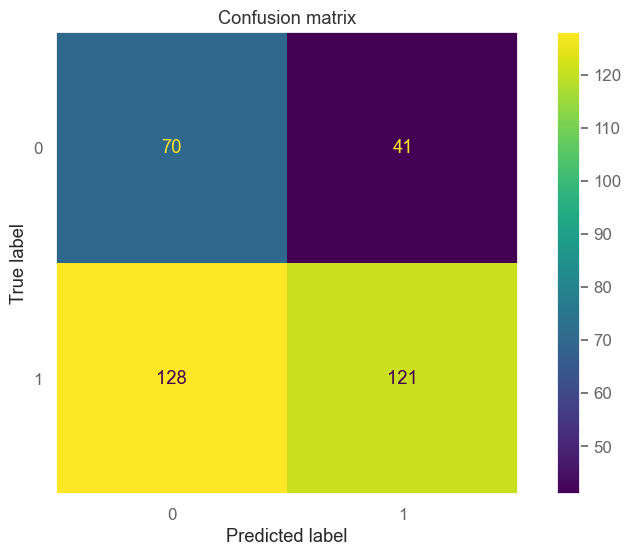

In [1281]:
# Display confussion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
X_test,
y_test,
# display_labels=model.classes_, cmap=plt.cm.Blues
    )
plt.title('Confusion matrix')
plt.grid(False)
plt.show()

We can also see an increase in the number of true positive (correctly predicted up trends) as a result of our hyperparameter tuning in the confusion matrix above, which indicates that the recall of our model, or its ability to identify up-trends, has improved significantly.  

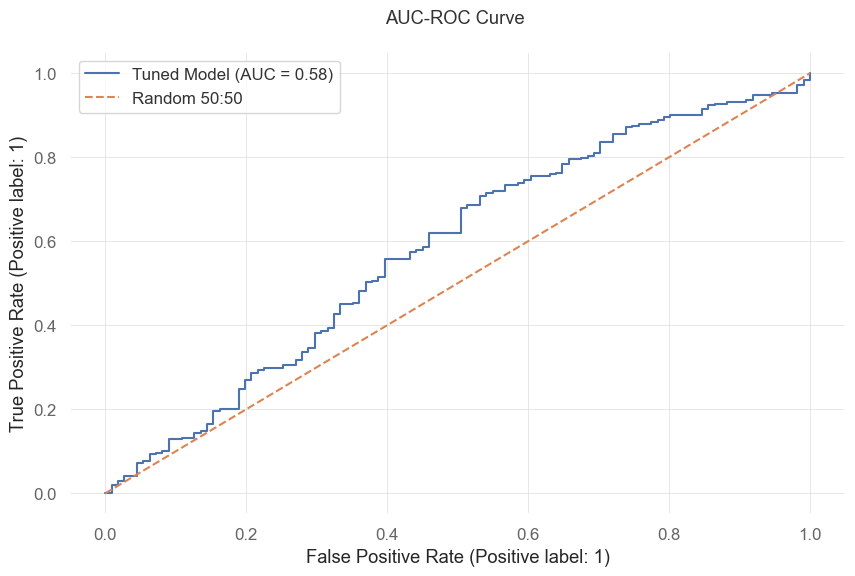

In [1282]:
# Display ROCCurve
disp = RocCurveDisplay.from_estimator(
            clf,
            X_test,
            y_test,
            name='Tuned Model')
plt.title("AUC-ROC Curve \n")
plt.plot([0,1],[0,1],linestyle="--", label='Random 50:50')
plt.legend()
plt.show()

The AUC of our ROC curve has also improved slighly (around 2%) as a result of hyperparameter tuning, which indicates that the tuned model is better at differentiating between classes when compared to the initial baseline model. 

In [1283]:
# Classification Report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.35      0.63      0.45       111
           1       0.75      0.49      0.59       249

    accuracy                           0.53       360
   macro avg       0.55      0.56      0.52       360
weighted avg       0.63      0.53      0.55       360



The best precision and recall have been obtained, after playing around with trial and error tuning different hyperparmeters, by tuning the tolerance and gamma, which appeared to be the most significant hyperparameters from the optuna study. The classification report shows us that while the precision has stayed the same, we have greatly improved (over doubled) the recall of our model, which will improve its ability to identify up-trends. Additionally, the f1-score has improved by 22% (for class 1), which indicates the model is now better at prediciting up-trends than the baseline model. Hence, we have improved our classifier by leveraging hyperparameter tuning. 

The final test to evaluate our model's performance will be to visualise its performance by backtesting our buy signal on the historical time series. We will tell our model to enter, or to buy when the predicted signal is 1, and to exit or sell when the predicted signal is 0. Then, we can generate the returns of the buy and hold strategy and compare it to buying and selling using our signals, to see how our model performs. 

In [1255]:
df['Signal'] = clf.predict(X)  # Define Entry Logic
df['Entry'] = np.where(df['Signal'] == 1, df['Close'], 0)
# Defining Exit Logic
df['Exit'] = np.where((df['Entry'] != 0) & (df['Open'].shift(-1) <= df['Close']),
                      df['Open'].shift(-1), 0)
df['Exit'] = np.where((df['Entry'] != 0) & (df['Open'].shift(-1) > df['Close']),  # Calculate MTM
                      df['Close'].shift(-1), df['Exit'])
df['P&L'] = df['Exit'] - df['Entry']
# Generate Equity Curve
df['Equity'] = df['P&L'].cumsum() + df['Close'][0]  # Calculate Benchmark Return
df['Returns'] = np.log(df['Close']).diff().fillna(0)
# Calculate Strategy Return
df['Strategy'] = (df['Equity'] / df['Equity'].shift(1) - 1).fillna(0)


/var/folders/3j/fkdf3kt10cd7m13c5rz7sgdc0000gn/T/ipykernel_92794/2140996156.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [1256]:
# Generate HTML Strategy Report
# Refer HTML file for report
import quantstats as qs 
qs.reports.html(df['Strategy'], df['Returns'])

/Users/tridhamsm/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

/Users/tridhamsm/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

/Users/tridhamsm/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



/Users/tridhamsm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



We can see that our strategy has a cumulative return that is over twice that of the buy and hold strategy, as well as a higher Sharpe Ratio, and much higher 5Y annulised returns than buy and hold (11.88% vs 21.36%). Thus, we can see clearly that our model outperforms the buy and hold stratgey, and that our SVM classifier is able to correctly predict enough up trends to beat buy and hold.

## 4. Conclusions 

To summarise, we have outlined some theory behind logistic regression and voting classifiers, proceeded to build a SVM classification model to predict up-trends in the price of Bitcoin-USD, conducted hyperparameter tuning to improve our baseline model and then finally backtested our trading signal to see if it outperforms buy and hold (generating a tearsheet report in the process). 

Despite the fact that we were able to improve our model, there is still further room to improve the overall model performance. This can either be achieved by further hyperparameter tuning using alternative methods such as grid search, or by leveraging alternative classifcation models such as Random Forest and Gradient Boosting to see if they can outperform SVM to classify price trends. 